In [1]:
#####パラメータに制約のある線形回帰モデル#####
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import numpy.matlib
import scipy.linalg
import itertools
from scipy import sparse
from pandas.tools.plotting import scatter_matrix
from numpy.random import *
from scipy import optimize
from scipy.stats import norm
import seaborn as sns

#np.random.seed(98537)

In [4]:
##データの生成
#データの設定
N = 10000
k = 15

In [38]:
#素性ベクトルを生成
k1 = 5; k2 = 6; k3 = 5
x1 = np.abs(np.array(np.random.random(N*k1)).reshape((N, k1)))
x2 = np.zeros((N, k2))
for j in range(k2):
    prob = np.random.uniform(0.25, 0.55, 1)
    x2[:, j] = np.random.binomial(1, prob, N)
x3 = np.random.multinomial(1, np.random.dirichlet(np.repeat(3.0, k3), 1).reshape(k3), N)
x3 = np.delete(x3, np.argmin(np.sum(x3, axis=0)), axis=1)   #冗長な変数の削除
x = np.concatenate((np.repeat(1, N)[:, np.newaxis], x1, x2, x3), axis=1)   #すべての説明変数を結合
k = x.shape[1]

(array([  6.,   9.,  33.,  80., 154., 258., 406., 581., 717., 819., 981.,
        982., 957., 866., 828., 666., 568., 404., 270., 183., 110.,  70.,
         35.,  13.,   4.]),
 array([ 0.77291787,  1.21696978,  1.66102169,  2.10507361,  2.54912552,
         2.99317743,  3.43722934,  3.88128126,  4.32533317,  4.76938508,
         5.21343699,  5.65748891,  6.10154082,  6.54559273,  6.98964464,
         7.43369655,  7.87774847,  8.32180038,  8.76585229,  9.2099042 ,
         9.65395612, 10.09800803, 10.54205994, 10.98611185, 11.43016376,
        11.87421568]),
 <a list of 25 Patch objects>)

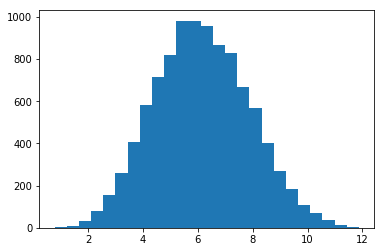

In [39]:
#パラメータを設定
beta = beta = np.append(-0.5, np.random.normal(-0.25, 0.5, k-1))
Sigma = np.array([0.5])
betat = beta.copy(); Sigmat = Sigma.copy()

#正規分布から応答変数を生成
mu = np.dot(x, np.exp(beta))
y = np.random.normal(mu, Sigma, N)
plt.hist(y, bins=25)

In [51]:
##パラメータを推定
#最小二乗法でパラメータを推定
beta = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

#推定されたパラメータ
print(np.round(np.append(beta, np.exp(betat)).reshape(2, k), 3))
print(np.round(np.append(np.log(beta), betat).reshape(2, k), 3))

[[0.603 0.987 2.272 1.129 0.474 0.52  0.554 2.111 1.284 0.217 0.386 1.039
  0.983 1.362 0.214 0.311]
 [0.607 0.957 2.277 1.135 0.479 0.517 0.557 2.111 1.277 0.236 0.373 1.057
  0.965 1.35  0.235 0.303]]
[[-0.506 -0.013  0.821  0.122 -0.746 -0.654 -0.591  0.747  0.25  -1.529
  -0.951  0.038 -0.017  0.309 -1.544 -1.167]
 [-0.5   -0.044  0.823  0.127 -0.736 -0.66  -0.585  0.747  0.245 -1.443
  -0.985  0.056 -0.035  0.3   -1.448 -1.193]]
